<a href="https://colab.research.google.com/github/Cristian-Rojas2/TalentoTech/blob/main/1_8_M%C3%A9todo_Monte_Carlo_y_Simulaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Retos:


*   Realizar un modelo de predección con los datos orginales ¿Cuál es su error cuadrático medio?
*   Une los datos originales y , realiza un modelo de predección con los datos simulados ¿Cuál es su error cuadrático medio?
*   ¿Los datos simulados realizaron alguna contribución?

## Métodos de Monte-Carlo
Los Métodos de Monte-Carlo son técnicas para analizar fenómenos por medio de algoritmos computacionales, que utilizan y dependen fundamentalmente de la generación de números aleatorios. El término Monte-Carlo, hace referencia al casino de Montecarlo, una de las capitales de los juegos de azar; y se utilizó como denominación para estás técnicas por la aleatoriedad inherente que poseen. El estudio de los Métodos de Monte-Carlo requiere un conocimiento detallado en una amplia gama de campos; por ejemplo, la probabilidad para describir los experimentos y procesos aleatorios, la estadística para analizar los datos, las ciencias de la computación para implementar eficientemente los algoritmos y la programación matemática para formular y resolver problemas de optimización.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import yfinance as yf
np.random.seed(1984)
%matplotlib inline
import pandas_datareader as dr
from datetime import date, datetime, timedelta
plt.style.use("ggplot")

In [ ]:
# Utilizando random para genera números aleatorios.
import random
random.seed(1984) # semilla para replicar la aleatoriedad
random.random() # primer llamado a random

0.36352835585530807

In [ ]:
random.random() # segundo llamado a random

0.49420568181919666

In [ ]:
for i in range(6):
    print(random.random()) # 5 números aleatorios

0.33961008717180197
0.21648780903913534
0.8626522767441037
0.8493329421213219
0.38578540884489343
0.24405748180364206


In [ ]:
# volviendo a llamar a seed para replicar el mismo resultado aleatorio.
random.seed(1984)
for i in range(7):
    print(random.random()) # Mismos resultados que arriba.

0.36352835585530807
0.49420568181919666
0.33961008717180197
0.21648780903913534
0.8626522767441037
0.8493329421213219
0.38578540884489343


Los Métodos de Monte-Carlo se basan en la analogía entre probabilidad y volumen. Las matemáticas de las medidas formalizan la noción intuitiva de probabilidad, asociando un evento con un conjunto de resultados y definiendo que la probabilidad del evento será el volumen o medida relativa del universo de posibles resultados. Monte-Carlo usa esta identidad a la inversa, calculando el volumen de un conjunto interpretando el volumen como una probabilidad. En el caso más simple, esto significa muestrear aleatoriamente un universo de resultados posibles y tomar la fracción de muestras aleatorias que caen en un conjunto dado como una estimación del volumen del conjunto. La ley de grandes números asegura que esta estimación converja al valor correcto a medida que aumenta el número de muestras. El teorema del límite central proporciona información sobre la magnitud del probable error en la estimación después de un número finito de muestras. En esencia podemos decir que el Método de Monte-Carlo consiste en calcular o aproximar ciertas expresiones a través de adivinarlas con la ayuda de dibujar una cantidad normalmente grande de números aleatorios. Veamos como funciona con un ejemplo, calculemos el área de un círculo de radio 1; lo que es lo mismo a decir que aproximemos el valor de π
.

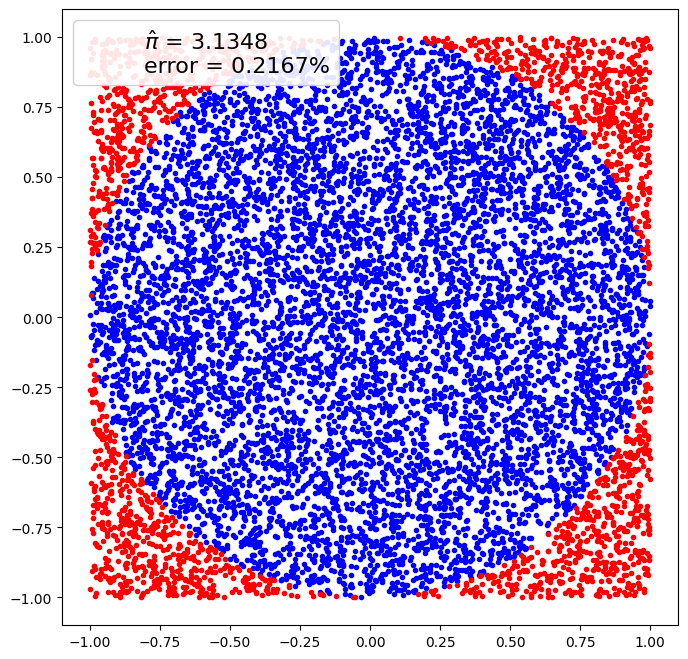

In [ ]:
# Ejemplo: Aproximando el valor de pi - área de un círculo de
# radio = 1.

def mc_pi_aprox(N=10000):
    plt.figure(figsize=(8,8))  # tamaño de la figura
    x, y = np.random.uniform(-1, 1, size=(2, N))
    interior = (x**2 + y**2) <= 1
    pi = interior.sum() * 4 / N
    error = abs((pi - np.pi) / pi) * 100
    exterior = np.invert(interior)
    plt.plot(x[interior], y[interior], 'b.')
    plt.plot(x[exterior], y[exterior], 'r.')
    plt.plot(0, 0, label='$\hat \pi$ = {:4.4f}\nerror = {:4.4f}%'
             .format(pi,error), alpha=0)
    plt.axis('square')
    plt.legend(frameon=True, framealpha=0.9, fontsize=16)

mc_pi_aprox()

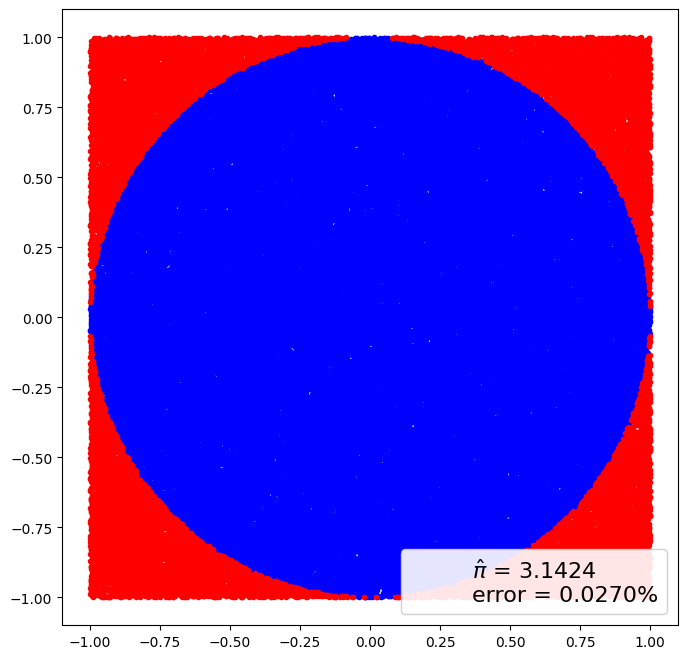

In [ ]:
# con 1000000 experimentos
mc_pi_aprox(N=100000)

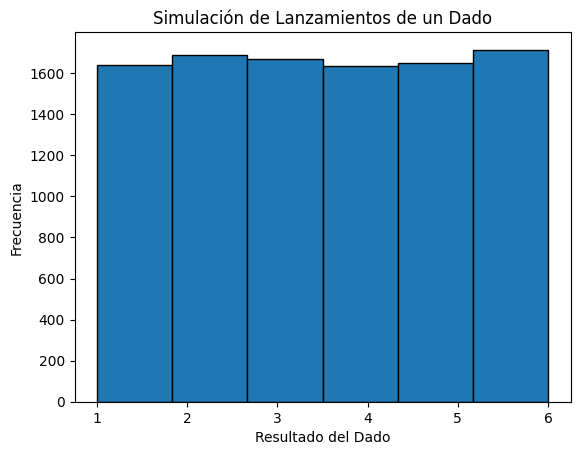

In [ ]:
# Simulación de lanzamiento de un dado 10,000 veces
resultados = np.random.randint(1, 7, 10000)

# Visualización de resultados
plt.hist(resultados, bins=6, edgecolor='black')
plt.title('Simulación de Lanzamientos de un Dado')
plt.xlabel('Resultado del Dado')
plt.ylabel('Frecuencia')
plt.show()

## Simulación en acciones

[*********************100%***********************]  1 of 1 completed


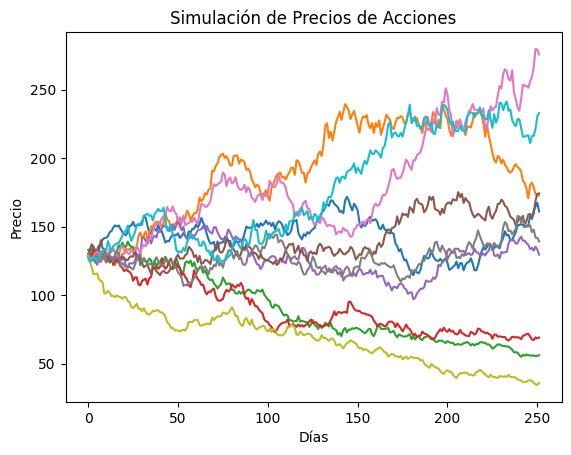

In [ ]:
# Descargar datos de una acción
data = yf.download('AAPL', start='2020-01-01', end='2023-01-01')
precios = data['Adj Close'].values

# Simular trayectorias de precios usando Monte Carlo
S0 = precios[-1]  # Precio inicial
T = 252  # Días en un año
mu = np.mean(np.diff(np.log(precios)))  # Rentabilidad media
sigma = np.std(np.diff(np.log(precios)))  # Volatilidad
n_simulaciones = 1000  # Número de simulaciones
trayectorias = np.zeros((T, n_simulaciones))

for i in range(n_simulaciones):
    trayectorias[:, i] = S0 * np.exp(np.cumsum((mu - 0.5 * sigma ** 2) + sigma * np.random.normal(size=T)))

# Visualizar algunas trayectorias
for i in range(10):
    plt.plot(trayectorias[:, i])

plt.title('Simulación de Precios de Acciones')
plt.xlabel('Días')
plt.ylabel('Precio')
plt.show()

## Aplicación con dataset
# Consumo de energía eléctrica en hogares individuales
Mediciones del consumo de energía eléctrica en un hogar con una frecuencia de muestreo de un minuto durante un período de casi 4 años. Se encuentran disponibles diferentes magnitudes eléctricas y algunos valores de submedición.

In [18]:
# abrir el archivo
df = pd.read_csv('/content/household_power_consumption.txt', sep=';', low_memory=False)
print(df.head())

         Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0  


In [19]:
# Limpiar los datos y seleccionar una variable de interés (Global_active_power)
# Filtramos los datos no disponibles
df = df.dropna(subset=['Global_active_power'])

In [20]:
# Convertimos Global_active_power a float
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
globalpower = df['Global_active_power']

In [21]:
# convertir date a tipo fecha
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

<ipython-input-21-eefccd715a08>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [22]:
# tipo de dato que es date
print(df['Date'].dtype)

datetime64[ns]


In [23]:
# agrupar por día
daily_data = df.groupby(df['Date'].dt.date)['Global_active_power'].sum()
print(daily_data.head())

Date
2006-12-16    1209.176
2006-12-17    3390.460
2006-12-18    2203.826
2006-12-19    1666.194
2006-12-20    2225.748
Name: Global_active_power, dtype: float64


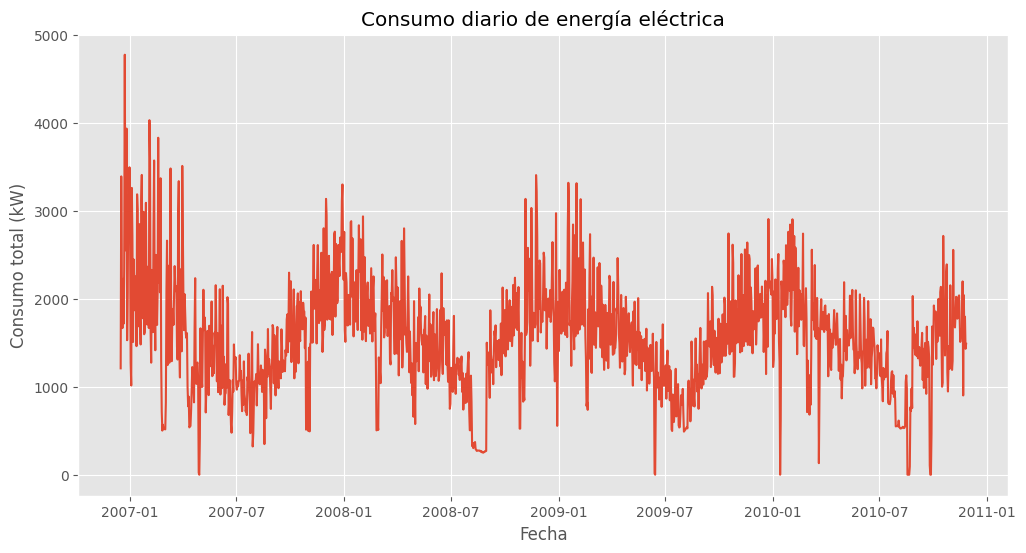

In [24]:
# prompt: graficar daily_data
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data.values)
plt.title('Consumo diario de energía eléctrica')
plt.xlabel('Fecha')
plt.ylabel('Consumo total (kW)')
plt.grid(True)
plt.show()

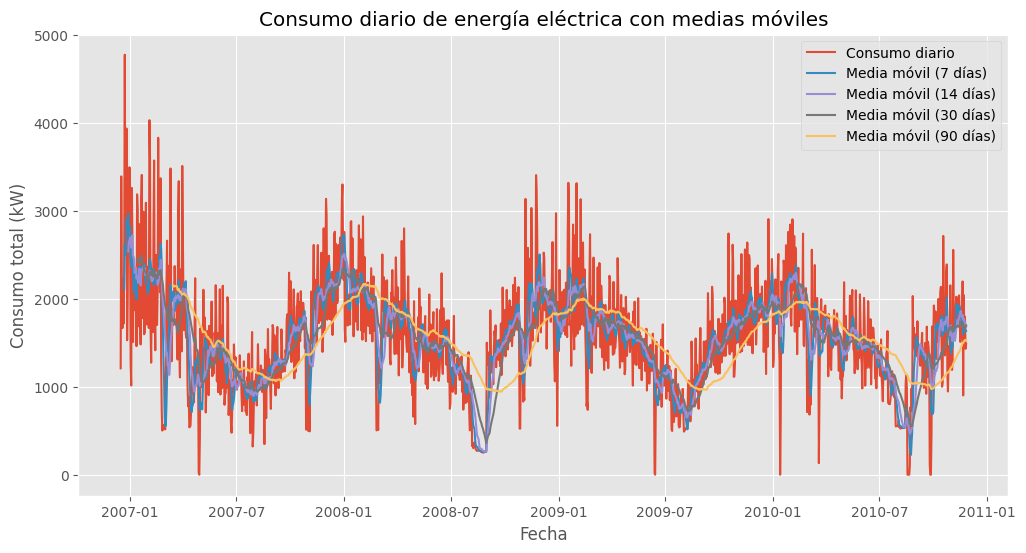

In [25]:
# calcular la media movil ideal
# Calcular la media móvil con diferentes ventanas
window_sizes = [7, 14, 30, 90]  # Diferentes tamaños de ventana para la media móvil
rolling_means = {}

for window_size in window_sizes:
    rolling_means[window_size] = daily_data.rolling(window=window_size).mean()

# Visualizar las medias móviles
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data.values, label='Consumo diario')

for window_size, rolling_mean in rolling_means.items():
    plt.plot(daily_data.index, rolling_mean.values, label=f'Media móvil ({window_size} días)')

plt.title('Consumo diario de energía eléctrica con medias móviles')
plt.xlabel('Fecha')
plt.ylabel('Consumo total (kW)')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
# selecciona la mejor media movil menor a 90 respecto al error cuadratico
from sklearn.metrics import mean_squared_error

# Calcular el error cuadrático medio para cada media móvil
errors = {}
for window_size, rolling_mean in rolling_means.items():
  if window_size < 90:
    # Asegurarse de que los datos tengan el mismo tamaño
    valid_indices = rolling_mean.notna()
    rmse = mean_squared_error(daily_data[valid_indices], rolling_mean[valid_indices], squared=False)
    errors[window_size] = rmse

# Encontrar la media móvil con el menor error
best_window_size = min(errors, key=errors.get)
print(f"La mejor media móvil (menor a 90 días) con respecto al error cuadrático es de {best_window_size} días.")

La mejor media móvil (menor a 90 días) con respecto al error cuadrático es de 7 días.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [27]:
# Hacer media móvil para n = 7
n = 7
k = len(daily_data.values)
mmovil = np.empty(k)
mmovil[:] = np.nan
ini = 0
for i in range(n-1,k):
  mmovil[i] = np.sum(daily_data.values[ini:i+1])/n
  ini += 1
mmovil

array([          nan,           nan,           nan, ..., 1676.54114286,
       1644.97142857, 1633.21485714])

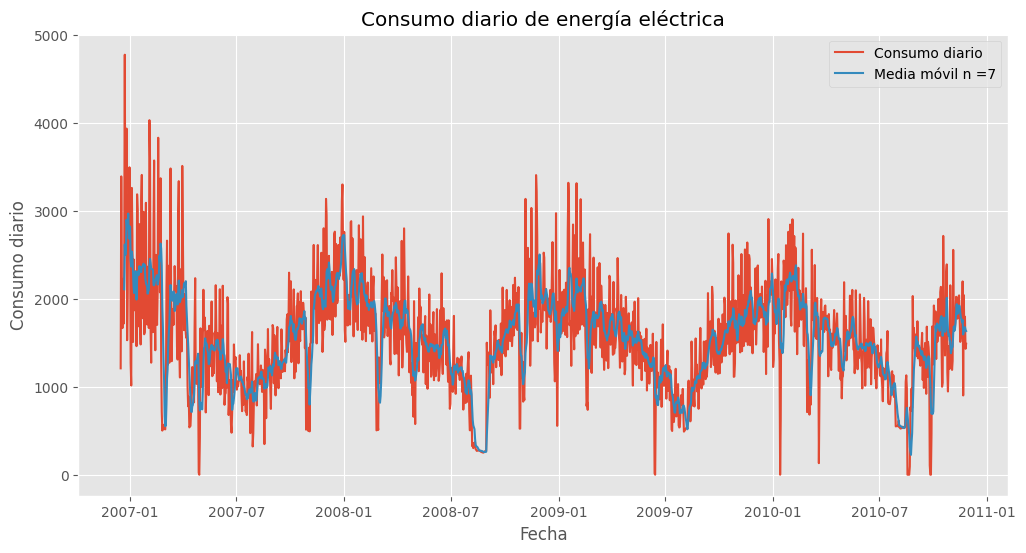

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data.values, label='Consumo diario')
plt.plot(daily_data.index, mmovil, label='Media móvil n =7')
plt.title('Consumo diario de energía eléctrica')
plt.xlabel('Fecha')
plt.ylabel('Consumo diario')
plt.legend()
plt.grid(True)
plt.show()

Continua con el modelo de series de tiempo y posteriormente haz lo mismo pero con los datos simulados.

,Global_active_power
Date,
2006-12-16,NaN
2006-12-17,NaN
2006-12-18,NaN
2006-12-19,NaN
2006-12-20,NaN
...,...
2010-11-22,405.281143
2010-11-23,-68.402857
2010-11-24,119.706857


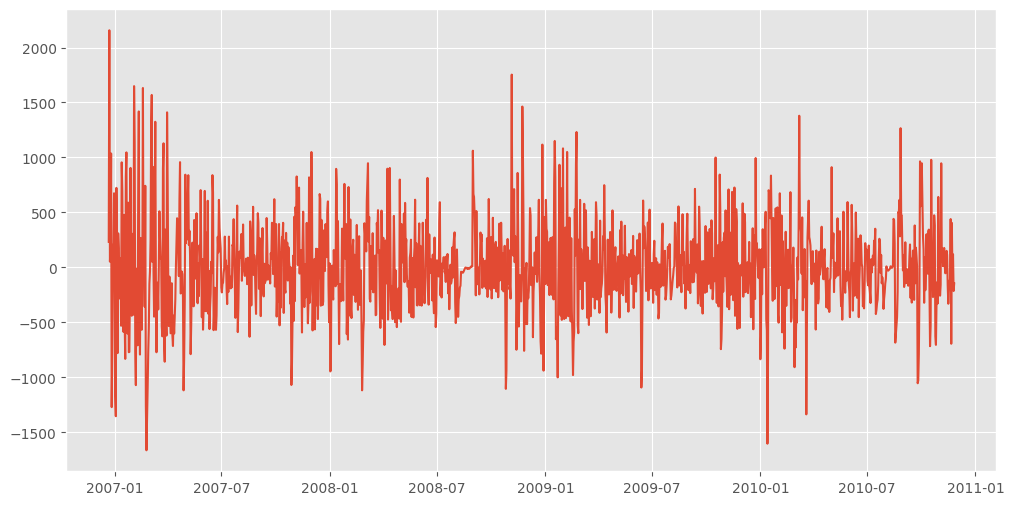

In [31]:
# Estacionalidad
estacionalidad = daily_data-mmovil
estacionalidad
plt.figure(figsize=(12, 6))
plt.plot(estacionalidad.index, estacionalidad.values)
estacionalidad

In [34]:
import statsmodels.api as sm

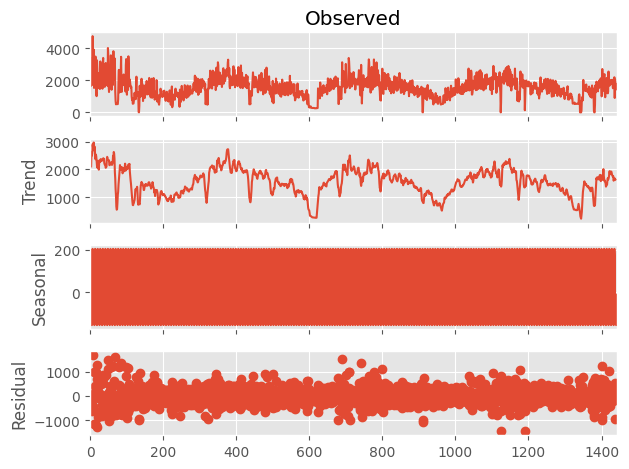

In [39]:
#Descomposicion
decomposition = sm.tsa.seasonal_decompose(daily_data.values, model='additive', period=7)
decomposition.plot()
plt.show()

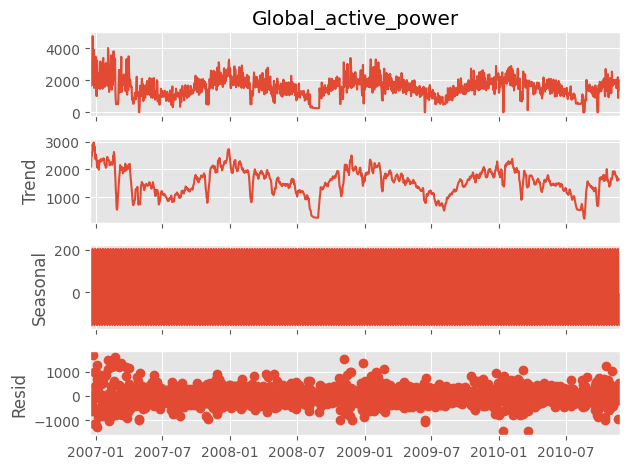

In [36]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming 'daily_data' is your pandas Series or DataFrame

# 1. Ensure 'daily_data' has a DateTimeIndex
if not isinstance(daily_data.index, pd.DatetimeIndex):
    daily_data.index = pd.to_datetime(daily_data.index)

# 2. Infer or set the frequency of the DateTimeIndex
# If the frequency can be inferred, use:
daily_data = daily_data.asfreq(pd.infer_freq(daily_data.index))
# If you know the frequency (e.g., daily 'D', monthly 'M'), use:
# daily_data = daily_data.asfreq('D') # Replace 'D' with the actual frequency

#Descomposicion
decomposition = sm.tsa.seasonal_decompose(daily_data, model='additive')
decomposition.plot()
plt.show()

In [32]:
daily_data_df = pd.DataFrame({'Fecha': daily_data.index, 'Consumo':daily_data.values})
daily_data_df

,Fecha,Consumo
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748
...,...,...
1437,2010-11-22,2041.536
1438,2010-11-23,1577.536
1439,2010-11-24,1796.248
1440,2010-11-25,1431.164


In [33]:
from statsmodels.tsa.arima.model import ARIMA

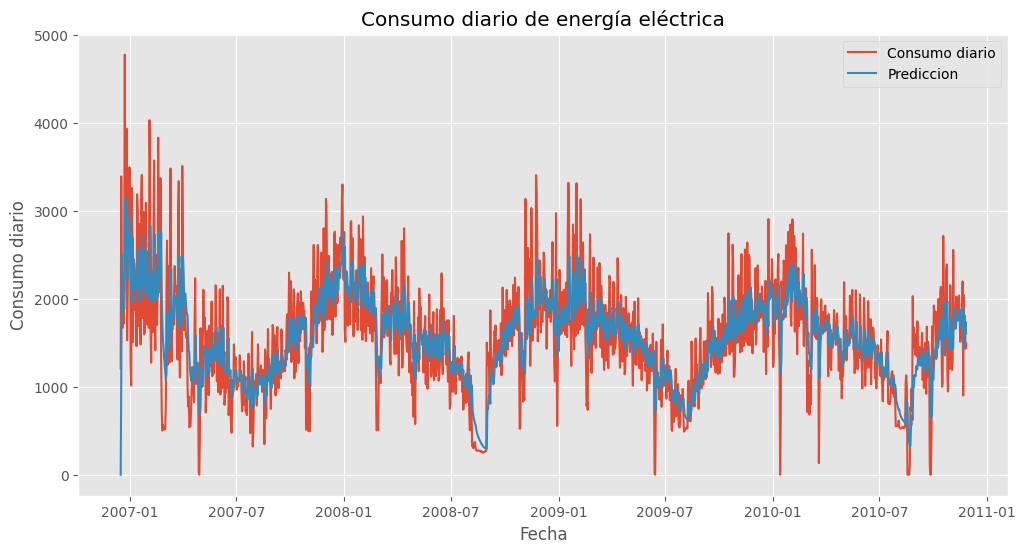

In [42]:
model = ARIMA(daily_data_df['Consumo'], order=(1, 1, 1))
model_fit = model.fit()
daily_data_df['prediccion'] = model_fit.fittedvalues
plt.figure(figsize=(12, 6))
plt.plot(daily_data_df['Fecha'], daily_data_df['Consumo'], label='Consumo diario')
plt.plot(daily_data_df['Fecha'], daily_data_df['prediccion'], label='Prediccion')
plt.title('Consumo diario de energía eléctrica')
plt.xlabel('Fecha')
plt.ylabel('Consumo diario')
plt.legend()

In [46]:
#ARIMA error cuadratico medio
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(daily_data_df['Consumo'], order=(1, 1, 1))
model_fit = model.fit()
daily_data_df['prediccion'] = model_fit.fittedvalues
rmse = mean_squared_error(daily_data_df['Consumo'], daily_data_df['prediccion'], squared=False)
print(f"El error cuadrático medio (RMSE) es: {rmse}")


El error cuadrático medio (RMSE) es: 456.28839721215513


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [47]:
# Análisis preliminar
# Revisamos estadísticas clave de consumo de energía
mean_consumption = df['Global_active_power'].mean()  # Media
std_consumption = df['Global_active_power'].std()    # Desviación estándar
print(f"Media del consumo de energía: {mean_consumption} kW")
print(f"Desviación estándar del consumo de energía: {std_consumption} kW")

Media del consumo de energía: 1.0916150365006245 kW
Desviación estándar del consumo de energía: 1.0572941610941602 kW


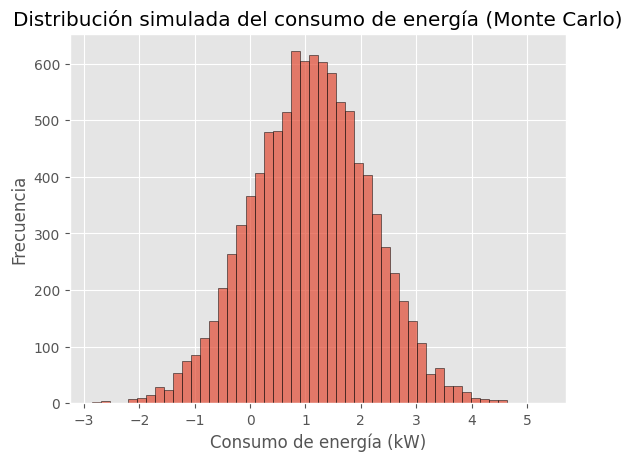

In [48]:
# Definir la simulación Monte Carlo
# Vamos a simular 10000 escenarios de consumo de energía futura
num_simulations = 10000
# Simulamos escenarios de consumo basado en una distribución normal
simulated_consumption = np.random.normal(loc=mean_consumption, scale=std_consumption, size=num_simulations)

# Visualizar los resultados
plt.hist(simulated_consumption, bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribución simulada del consumo de energía (Monte Carlo)')
plt.xlabel('Consumo de energía (kW)')
plt.ylabel('Frecuencia')
plt.show()

In [49]:
# imprime el dataset con los datos simulados, convierte en dataset y coloca fechas

# Suponiendo que 'simulated_consumption' contiene los datos simulados
# y que 'daily_data' es el DataFrame original con fechas

# Crear un rango de fechas para los datos simulados
start_date = daily_data.index[-1] + timedelta(days=1)  # Empezar desde el día siguiente al último del dataset original
end_date = start_date + timedelta(days=len(simulated_consumption) - 1)
date_range = pd.date_range(start=start_date, end=end_date)

# Crear un DataFrame con los datos simulados y las fechas
simulated_df = pd.DataFrame({'Global_active_power': simulated_consumption}, index=date_range)

# Imprimir el DataFrame con los datos simulados
print(simulated_df)


            Global_active_power
2010-11-27             0.359944
2010-11-28             0.835219
2010-11-29            -0.541423
2010-11-30            -0.465666
2010-12-01             1.137956
...                         ...
2038-04-09             1.473112
2038-04-10             0.488129
2038-04-11             0.787232
2038-04-12             1.782704
2038-04-13             1.200100

[10000 rows x 1 columns]


In [50]:
# Análisis de percentiles
# Cálculo de percentiles del consumo
percentile_95 = np.percentile(simulated_consumption, 95)
percentile_50 = np.percentile(simulated_consumption, 50)

print(f"El percentil 95 del consumo de energía es: {percentile_95} kW")
print(f"El percentil 50 (mediana) del consumo de energía es: {percentile_50} kW")

El percentil 95 del consumo de energía es: 2.82815018269942 kW
El percentil 50 (mediana) del consumo de energía es: 1.1039204106533926 kW


In [51]:
# Simulación del consumo total anual (suponiendo que los datos son horarios)
# Supongamos que simulamos el consumo total durante un año (8760 horas)
hours_per_year = 8760
total_consumption_per_year = []

for i in range(num_simulations):
    # Sumamos el consumo simulado para cada hora del año
    total_yearly_consumption = np.sum(np.random.normal(loc=mean_consumption, scale=std_consumption, size=hours_per_year))
    total_consumption_per_year.append(total_yearly_consumption)

# Convertimos a array de numpy para facilidad
total_consumption_per_year = np.array(total_consumption_per_year)

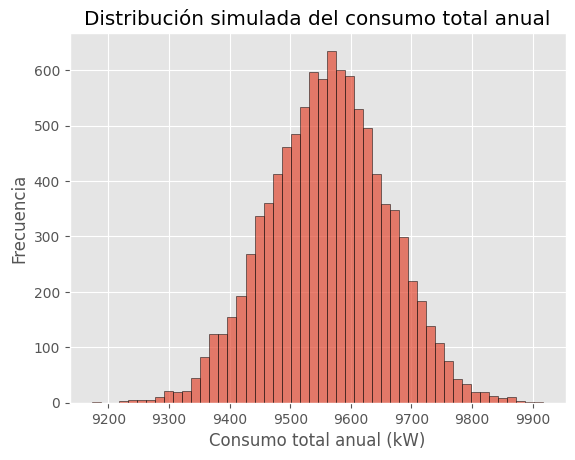

In [52]:
# Visualizamos la distribución del consumo total anual
plt.hist(total_consumption_per_year, bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribución simulada del consumo total anual')
plt.xlabel('Consumo total anual (kW)')
plt.ylabel('Frecuencia')
plt.show()

In [53]:
# Cálculo de probabilidades y percentiles del consumo total anual
mean_total_consumption_per_year = np.mean(total_consumption_per_year)
percentile_95_total = np.percentile(total_consumption_per_year, 95)

print(f"El consumo total medio anual es: {mean_total_consumption_per_year} kW")
print(f"El percentil 95 del consumo total anual es: {percentile_95_total} kW")

El consumo total medio anual es: 9562.386408778975 kW
El percentil 95 del consumo total anual es: 9721.519188167042 kW


# 2.

In [54]:
power=daily_data.values

In [55]:
date=daily_data.index

In [56]:
#Convertir daily_data en data frame
dataset = pd.DataFrame({'date': daily_data.index, 'power': daily_data.values.flatten()})
print(dataset.head())

        date     power
0 2006-12-16  1209.176
1 2006-12-17  3390.460
2 2006-12-18  2203.826
3 2006-12-19  1666.194
4 2006-12-20  2225.748


In [57]:
# Estacionalidad
est = power - mmovil
est

array([          nan,           nan,           nan, ...,  119.70685714,
       -213.80742857, -145.11085714])

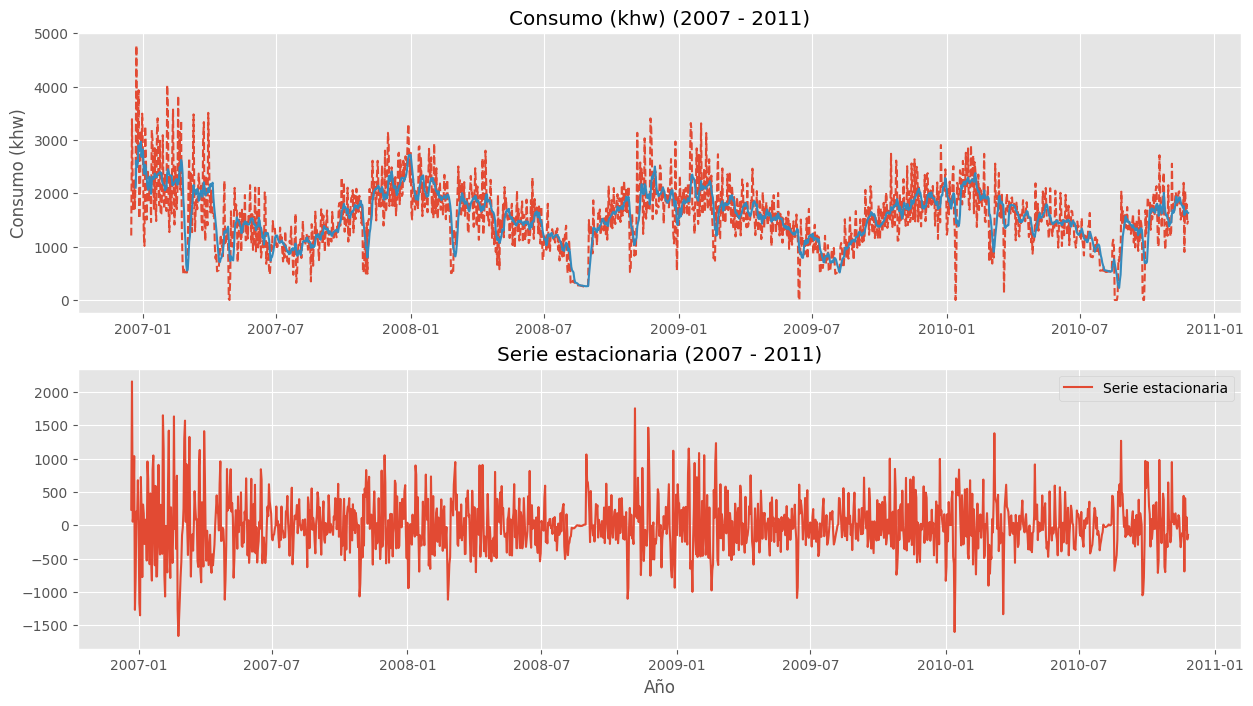

In [58]:
plt.figure(figsize=(15,8))
plt.subplot(211)
plt.plot(dataset['date'],dataset['power'], '--', label='Ingresos')
plt.plot(dataset['date'],mmovil, label='Media móvil n =3')
plt.title('Consumo (khw) (2007 - 2011)')
plt.ylabel('Consumo (khw)')
plt.subplot(212)
plt.plot(dataset['date'],est, '-',label='Serie estacionaria')
plt.title('Serie estacionaria (2007 - 2011)')
plt.xlabel('Año')
plt.legend()
plt.show()

# Descomposición

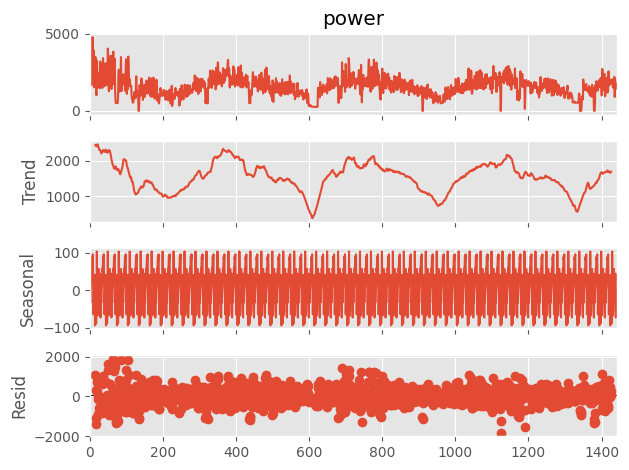

In [59]:
# Replace 'freq' with 'period'
descomposicion = sm.tsa.seasonal_decompose(dataset['power'], model='additive', period=30)
descomposicion.plot();

# Modelo ARIMA

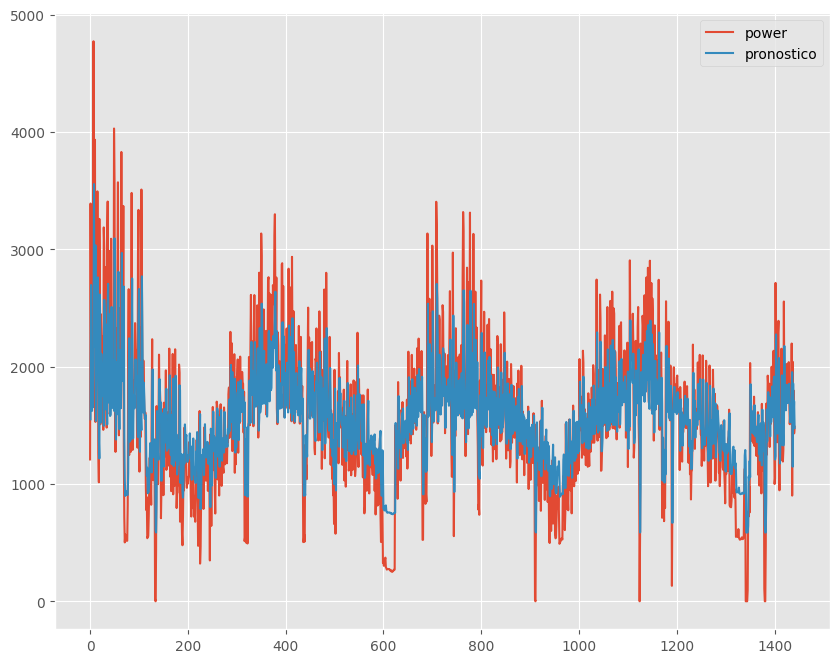

In [60]:
from statsmodels.tsa.arima.model import ARIMA
modelo = ARIMA(dataset['power'].iloc[1:], order=(1,0,0))
resultados = modelo.fit()
dataset['pronostico'] = resultados.fittedvalues
plot = dataset[['power', 'pronostico']].plot(figsize=(10, 8));

In [61]:
# Error cuadrático
dataset.dropna(inplace=True)
rmse_arima = mean_squared_error(
    dataset['power'], dataset['pronostico'], squared=False
)
print(f"El error cuadrático medio del modelo ARIMA es: {rmse_arima}")

El error cuadrático medio del modelo ARIMA es: 484.8738206283136


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [62]:
# Revisamos estadísticas clave de consumo de energía
mean_consumption = dataset['power'].mean()  # Media
std_consumption = dataset['power'].std()    # Desviación estándar
print(f"Media del consumo de energía: {mean_consumption} kW")
print(f"Desviación estándar del consumo de energía: {std_consumption} kW")

Media del consumo de energía: 1551.572301179736 kW
Desviación estándar del consumo de energía: 617.4455411931134 kW


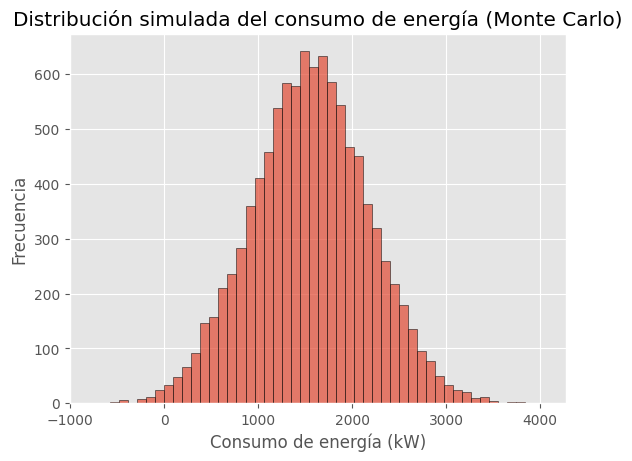

In [63]:
# Definir la simulación Monte Carlo
# Vamos a simular 10000 escenarios de consumo de energía futura
num_simulations = 10000
# Simulamos escenarios de consumo basado en una distribución normal
simulated_consumption = np.random.normal(loc=mean_consumption, scale=std_consumption, size=num_simulations)

# Visualizar los resultados
plt.hist(simulated_consumption, bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribución simulada del consumo de energía (Monte Carlo)')
plt.xlabel('Consumo de energía (kW)')
plt.ylabel('Frecuencia')
plt.show()

# Datos simulados

In [64]:
# dataset con los datos simulados, convierte en dataset y coloca fechas, Empezar desde el día siguiente al último del dataset original

# Find the last date in the original dataset
last_date = dataset['date'].max()

# Create a list of dates starting from the day after the last date
dates = [last_date + timedelta(days=i) for i in range(1, len(simulated_consumption) + 1)]

# Create a DataFrame with the simulated data and dates
df_simulated = pd.DataFrame({'date': dates, 'power': simulated_consumption})

# Print the simulated dataset with dates
print(df_simulated)

           date        power
0    2010-11-27   930.279015
1    2010-11-28  1379.779699
2    2010-11-29  1507.575435
3    2010-11-30  1888.307052
4    2010-12-01   576.521125
...         ...          ...
9995 2038-04-09  1032.225143
9996 2038-04-10  1745.489369
9997 2038-04-11   780.211168
9998 2038-04-12  1021.979235
9999 2038-04-13  2010.585777

[10000 rows x 2 columns]


In [65]:
# unir dataset y df_simulated

# Concatenate the original and simulated datasets
df_combined = pd.concat([dataset, df_simulated], ignore_index=True)

# Print the combined dataset
print(df_combined)

            date        power   pronostico
0     2006-12-17  3390.460000  1551.572311
1     2006-12-18  2203.826000  2695.723600
2     2006-12-19  1666.194000  1957.402914
3     2006-12-20  2225.748000  1622.889637
4     2006-12-21  1716.624000  1971.042727
...          ...          ...          ...
11436 2038-04-09  1032.225143          NaN
11437 2038-04-10  1745.489369          NaN
11438 2038-04-11   780.211168          NaN
11439 2038-04-12  1021.979235          NaN
11440 2038-04-13  2010.585777          NaN

[11441 rows x 3 columns]


In [66]:
# eliminar columna pronostico

# Assuming 'dataset' is your DataFrame with the 'pronostico' column
if 'pronostico' in df_combined.columns:
  df_combined = df_combined.drop('pronostico', axis=1)
  print("Columna 'pronostico' eliminada exitosamente.")
else:
  print("La columna 'pronostico' no existe en el DataFrame.")

Columna 'pronostico' eliminada exitosamente.


In [67]:
df_combined

,date,power
0,2006-12-17,3390.460000
1,2006-12-18,2203.826000
2,2006-12-19,1666.194000
3,2006-12-20,2225.748000
4,2006-12-21,1716.624000
...,...,...
11436,2038-04-09,1032.225143
11437,2038-04-10,1745.489369
11438,2038-04-11,780.211168
11439,2038-04-12,1021.979235


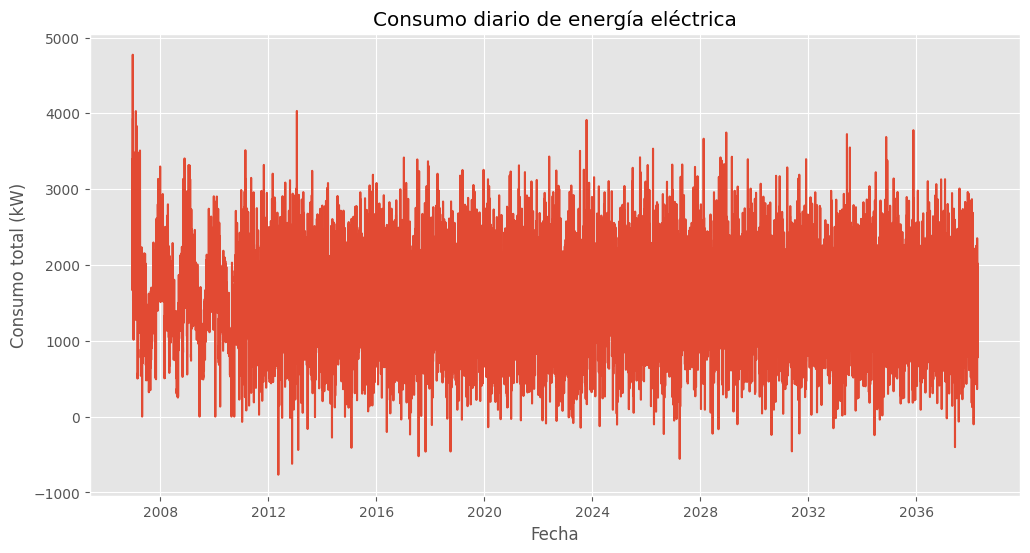

In [68]:
# graficar df_combined
plt.figure(figsize=(12, 6))
plt.plot(df_combined['date'] , df_combined['power'])
plt.title('Consumo diario de energía eléctrica')
plt.xlabel('Fecha')
plt.ylabel('Consumo total (kW)')
plt.grid(True)
plt.show()

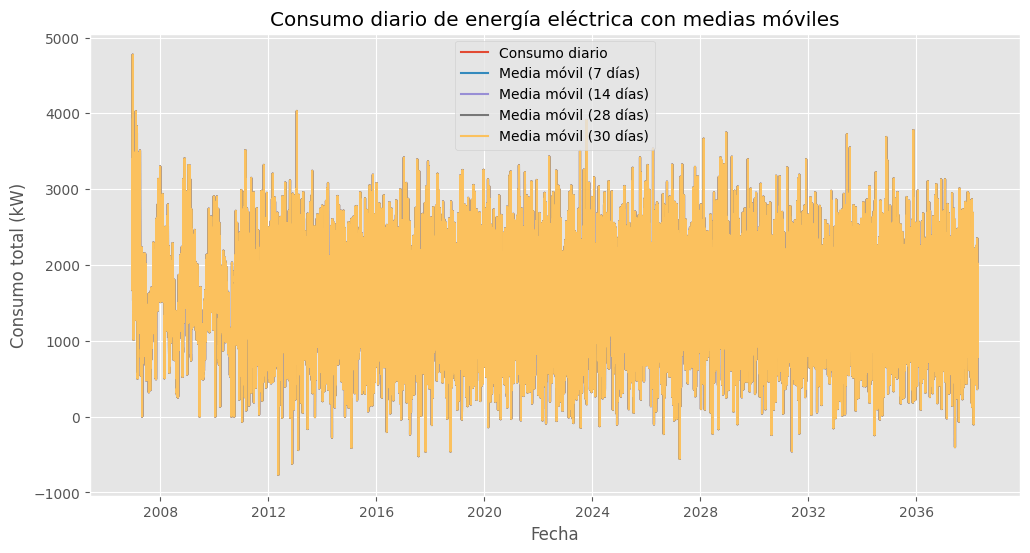

In [69]:
# calcular la media movil ideal
# Calcular la media móvil con diferentes ventanas
window_sizes = [7, 14, 28, 30]  # Diferentes tamaños de ventana para la media móvil
rolling_means = {}

for window_size in window_sizes:
    rolling_means[window_size] = df_combined['power'].rolling(window=window_size).mean()

# Visualizar las medias móviles
plt.figure(figsize=(12, 6))
plt.plot(df_combined['date'], df_combined['power'], label='Consumo diario')

for window_size, rolling_mean in rolling_means.items():
    plt.plot(df_combined['date'], df_combined['power'], label=f'Media móvil ({window_size} días)')

plt.title('Consumo diario de energía eléctrica con medias móviles')
plt.xlabel('Fecha')
plt.ylabel('Consumo total (kW)')
plt.legend()
plt.grid(True)
plt.show()

In [70]:
# Hacer media móvil para n = 7
n = 7
k = len(df_combined['power'])
mmovil = np.empty(k)
mmovil[:] = np.nan
ini = 0
for i in range(n-1,k):
  mmovil[i] = np.sum(df_combined['power'][ini:i+1])/n
  ini += 1
mmovil

array([          nan,           nan,           nan, ..., 1492.70837939,
       1302.62477235, 1401.93019578])

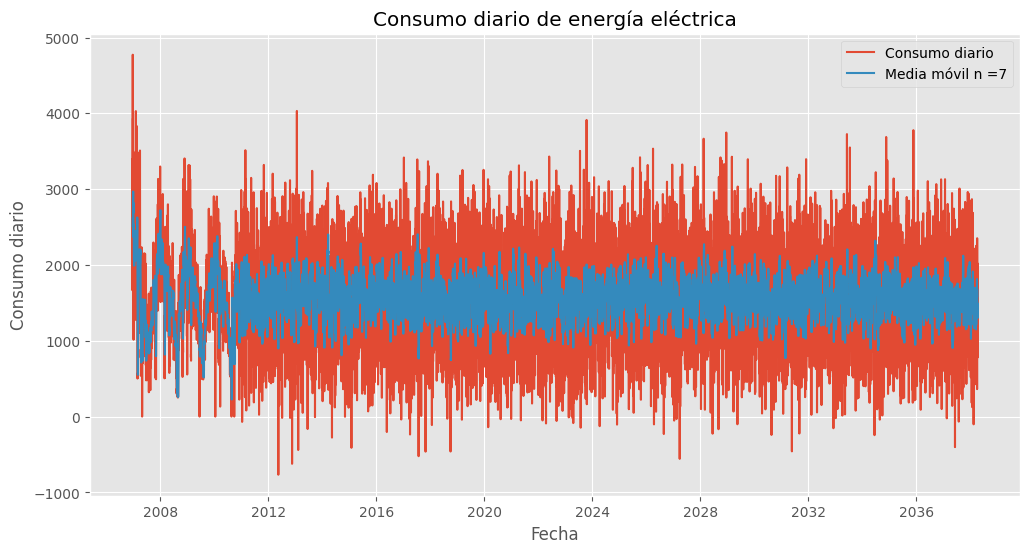

In [71]:
plt.figure(figsize=(12, 6))
plt.plot(df_combined['date'], df_combined['power'], label='Consumo diario')
plt.plot(df_combined['date'], mmovil, label='Media móvil n =7')
plt.title('Consumo diario de energía eléctrica')
plt.xlabel('Fecha')
plt.ylabel('Consumo diario')
plt.legend()
plt.grid(True)
plt.show()

In [72]:
power_combined=df_combined['power']

In [73]:
# Estacionalidad
est = power_combined - mmovil
est

,power
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
11436,-414.725147
11437,312.475983
11438,-712.497211
11439,-280.645537


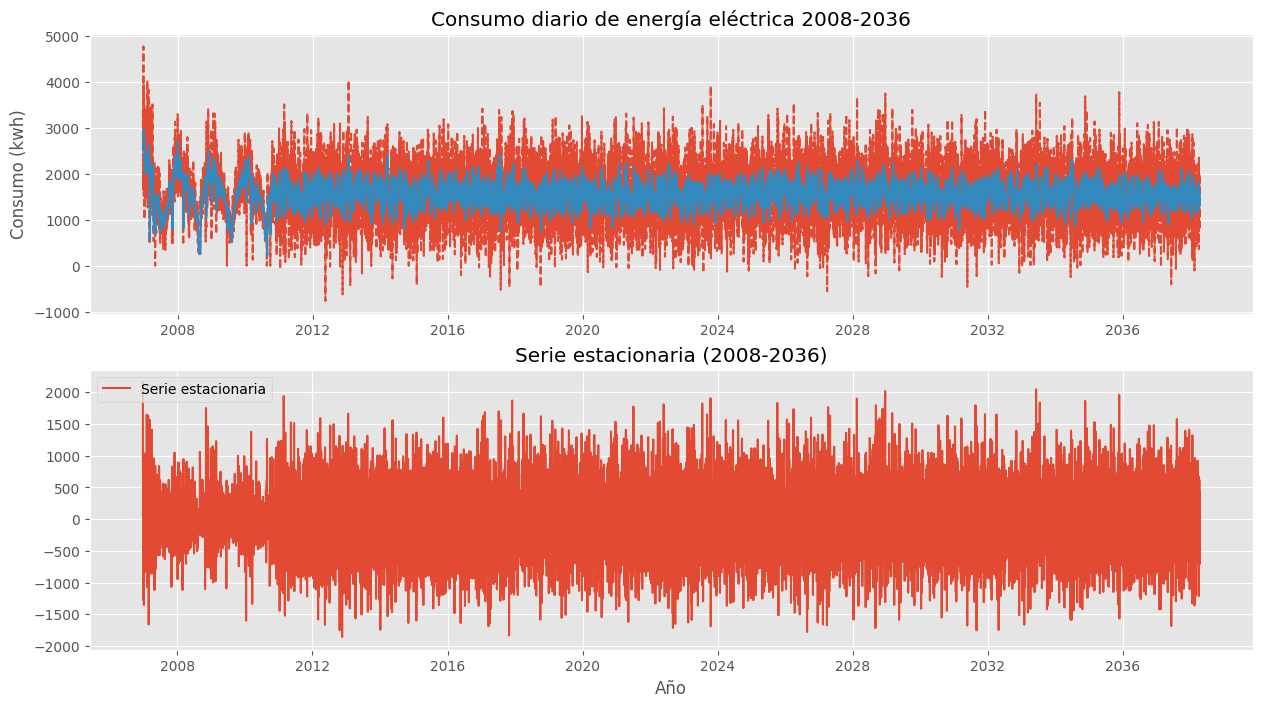

In [74]:
plt.figure(figsize=(15,8))
plt.subplot(211)
plt.plot(df_combined['date'],power_combined, '--', label='Ingresos')
plt.plot(df_combined['date'],mmovil, label='Media móvil n =3')
plt.title('Consumo diario de energía eléctrica 2008-2036')
plt.ylabel('Consumo (kwh)')
plt.subplot(212)
plt.plot(df_combined['date'],est, '-',label='Serie estacionaria')
plt.title('Serie estacionaria (2008-2036)')
plt.xlabel('Año')
plt.legend()
plt.show()

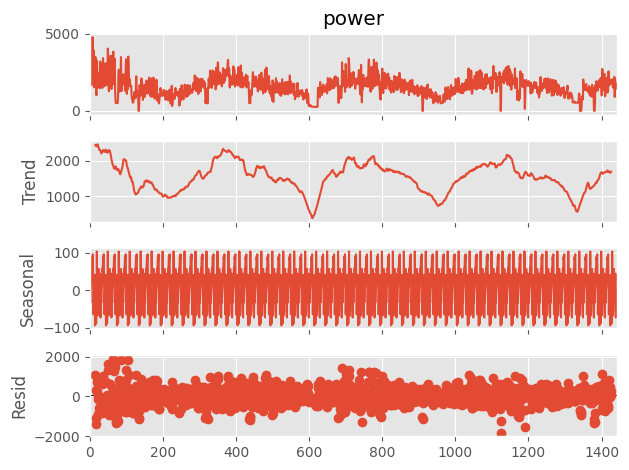

In [75]:
# Descomposición
descomposicion_com = sm.tsa.seasonal_decompose(df_combined['power'], model='additive', period=30)
descomposicion.plot();

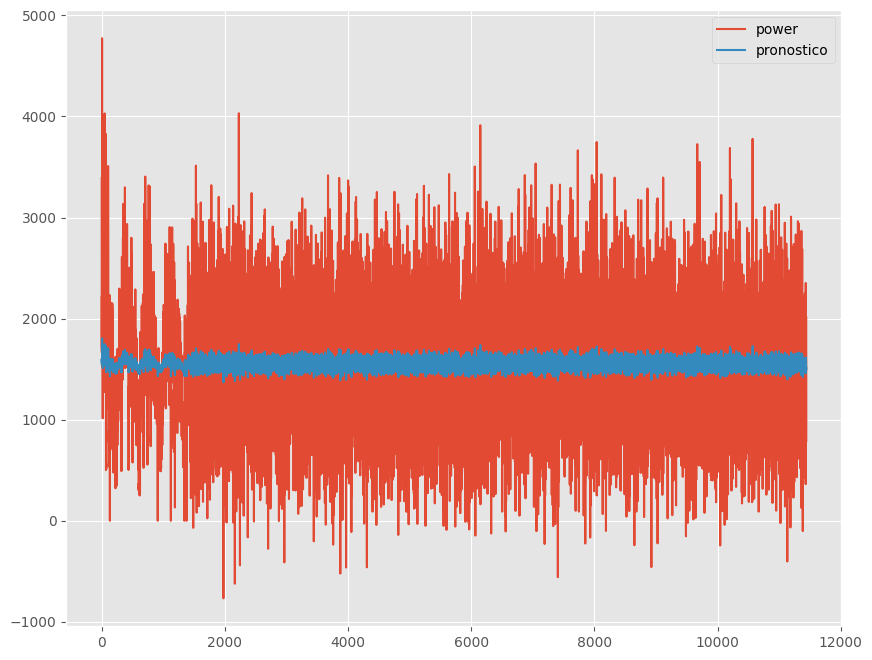

In [76]:
from statsmodels.tsa.arima.model import ARIMA
modelo = ARIMA(df_combined['power'].iloc[1:], order=(1,0,0))
resultados = modelo.fit()
df_combined['pronostico'] = resultados.fittedvalues
plot = df_combined[['power', 'pronostico']].plot(figsize=(10, 8));

In [77]:
# error cuadrático medio del modelo ARIMA
df_combined.dropna(inplace=True)
rmse_arima = mean_squared_error(
    df_combined['power'], df_combined['pronostico'], squared=False
)
print(f"El error cuadrático medio del modelo ARIMA es: {rmse_arima}")

El error cuadrático medio del modelo ARIMA es: 616.7313575565701


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
